In [26]:
import pandas as pd

# Ruta del archivo de Excel
ruta_excel = r"C:\Users\cdgn2\OneDrive\Escritorio\Maestría\Maestria\Metodologias Agiles\Proyecto\Comparative-analysis-of-products\src\comparative_analysis\database\Adidas_etiquetado.xlsx"

# Crear el DataFrame
df = pd.read_excel(ruta_excel, header=0)

# Mostrar las primeras filas del DataFrame
print(df.head())

       Weight                   Upper_Material      Midsole_Material  \
0       183 g                        Synthetic                   NaN   
1       289 g                 adidas Primeknit                 BOOST   
2       166 g  Parte superior de malla técnica                   NaN   
3  200 gramos          Parte superior de malla                   NaN   
4        319g            Parte superior textil  Mediasuela Cloudfoam   

                                     Outsole              Cushioning_System  \
0                             Textile rubber                Lightstrike Pro   
1  Stretchweb with Continental Better Rubber             Linear Energy Push   
2               Suela de caucho Continental™  Amortiguación Lightstrike Pro   
3         Suela de caucho Continental Rubber  Amortiguación Lightstrike Pro   
4                               Suela de TPU                      Cloudfoam   

  Drop__heel-to-toe_differential_ Pronation_Type Usage_Type  Gender  \
0                    

c:\Users\cdgn2\OneDrive\Escritorio\Maestría\Maestria\Metodologias Agiles\Proyecto\Comparative-analysis-of-products\venv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [27]:
# Buscar información de un elemento basado en un criterio
def buscar_elemento(df, columna, valor):
    # Filtrar el DataFrame por el valor especificado
    resultado = df[df[columna] == valor]
    
    # Verificar si se encontró algún resultado
    if not resultado.empty:
        print("Información del elemento encontrado:")
        print(resultado)
    else:
        print(f"No se encontró ningún elemento donde '{columna}' sea '{valor}'.")

# Ejemplo de uso: Buscar un elemento donde el id sea "12345" (ajusta según tu DataFrame)
buscar_elemento(df, columna="id", valor="08sjncACSjSvg2t9DS73")

Información del elemento encontrado:
  Weight Upper_Material Midsole_Material         Outsole Cushioning_System  \
0  183 g      Synthetic              NaN  Textile rubber   Lightstrike Pro   

  Drop__heel-to-toe_differential_ Pronation_Type Usage_Type Gender  \
0                            6 mm            NaN     Racing  Woman   

  Available_Sizes  Width                            Additional_Technologies  \
0             NaN    NaN  ENERGYRODS 2.0, Waterproofing, Recyclable mate...   

                     id regularPrice undiscounted_price  \
0  08sjncACSjSvg2t9DS73   $1.299.950           $909.965   

                                             details  \
0  {Horma clásica} {Parte superior sintética} {Fo...   

                                         description         category  \
0  Los Adizero Adios Pro 3 son la máxima expresió...  Mujer • Running   

   characteristics  
0              NaN  


In [28]:
print(df.columns.tolist())

['Weight', 'Upper_Material', 'Midsole_Material', 'Outsole', 'Cushioning_System', 'Drop__heel-to-toe_differential_', 'Pronation_Type', 'Usage_Type', 'Gender', 'Available_Sizes', 'Width', 'Additional_Technologies', 'id', 'regularPrice', 'undiscounted_price', 'details', 'description', 'category', 'characteristics']


In [29]:
import pandas as pd
import re

# Supongamos que tu DataFrame se llama df

# Convertir Weight a solo números y luego a float, manejando errores
df['Weight'] = df['Weight'].astype(str).str.extract('(\d+\.?\d*)').astype(float, errors='ignore')
# Si quieres forzar que valores no numéricos sean NaN
df['Weight'] = df['Weight'].astype(str).str.extract('(\d+\.?\d*)')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Drop__heel-to-toe_differential_
df['Drop__heel-to-toe_differential_'] = df['Drop__heel-to-toe_differential_'].astype(str).str.extract('(\d+\.?\d*)')
df['Drop__heel-to-toe_differential_'] = pd.to_numeric(df['Drop__heel-to-toe_differential_'], errors='coerce')

# regularPrice y undiscounted_price
df['regularPrice'] = df['regularPrice'].astype(str).str.replace(r'[^0-9.,]', '', regex=True)
df['undiscounted_price'] = df['undiscounted_price'].astype(str).str.replace(r'[^0-9.,]', '', regex=True)

df['regularPrice'] = df['regularPrice'].str.replace(r'\.', '', regex=True).str.replace(',', '.')
df['undiscounted_price'] = df['undiscounted_price'].str.replace(r'\.', '', regex=True).str.replace(',', '.')

# Convertir a numérico con manejo de errores
df['regularPrice'] = pd.to_numeric(df['regularPrice'], errors='coerce')
df['undiscounted_price'] = pd.to_numeric(df['undiscounted_price'], errors='coerce')

# Eliminar las columnas solicitadas
cols_to_drop = ['details', 'description', 'category', 'characteristics', 'width', 'Pronation_Type']
df = df.drop(columns=cols_to_drop, errors='ignore')

In [10]:
buscar_elemento(df, columna="id", valor="08sjncACSjSvg2t9DS73")

Información del elemento encontrado:
   Weight Upper_Material Midsole_Material         Outsole Cushioning_System  \
0   183.0      Synthetic              NaN  Textile rubber   Lightstrike Pro   

   Drop__heel-to-toe_differential_ Usage_Type Gender  Width  \
0                              6.0     Racing  Woman    NaN   

                             Additional_Technologies                    id  \
0  ENERGYRODS 2.0, Waterproofing, Recyclable mate...  08sjncACSjSvg2t9DS73   

   regularPrice undiscounted_price  
0  1.299950e+09             909965  


In [11]:
print(df.columns.tolist())

['Weight', 'Upper_Material', 'Midsole_Material', 'Outsole', 'Cushioning_System', 'Drop__heel-to-toe_differential_', 'Usage_Type', 'Gender', 'Width', 'Additional_Technologies', 'id', 'regularPrice', 'undiscounted_price']


In [30]:
df.head()

,Weight,Upper_Material,Midsole_Material,Outsole,Cushioning_System,Drop__heel-to-toe_differential_,Usage_Type,Gender,Available_Sizes,Width,Additional_Technologies,id,regularPrice,undiscounted_price
0,183.0,Synthetic,NaN,Textile rubber,Lightstrike Pro,6.0,Racing,Woman,NaN,NaN,"ENERGYRODS 2.0, Waterproofing, Recyclable mate...",08sjncACSjSvg2t9DS73,1299950,909965.0
1,289.0,adidas Primeknit,BOOST,Stretchweb with Continental Better Rubber,Linear Energy Push,NaN,Running,Woman,NaN,NaN,"Parley Ocean Plastic, waterproofing",0AqheRhKT2lhm7puBVCF,799950,NaN
2,166.0,Parte superior de malla técnica,NaN,Suela de caucho Continental™,Amortiguación Lightstrike Pro,6.0,Running,Mujer,COL 36 1/2,NaN,Contiene al menos un 20 % de material reciclad...,0IgYTzUHkE7zIdcVyFCK,1049950,629970.0
3,200.0,Parte superior de malla,NaN,Suela de caucho Continental Rubber,Amortiguación Lightstrike Pro,6.0,Running,Hombre,CO 40,NaN,"Varillas ENERGYRODS, Talón Slinglaunch, Contie...",0MU8aKCnCUZv2r9aLD67,1049950,734965.0
4,319.0,Parte superior textil,Mediasuela Cloudfoam,Suela de TPU,Cloudfoam,6.0,Running,Hombre,CO 40,NaN,NaN,0Q6DNSlvsjBzy3AQeY2y,279950,NaN


In [20]:
a=df[df['Weight'] > 1000]
a

,Weight,Upper_Material,Midsole_Material,Outsole,Cushioning_System,Drop__heel-to-toe_differential_,Usage_Type,Gender,Available_Sizes,Width,Additional_Technologies,id,regularPrice,undiscounted_price


In [36]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Suponiendo que ya tienes el DataFrame limpio "df"
# Asegúrate de que 'id' está presente y el resto de las columnas ya están procesadas

# Separar la columna ID
ids = df['id']
# Asumiendo que tu DataFrame se llama df y que ya eliminaste o separaste el 'id'.
X = df.drop(columns=['id'], errors='ignore')

# Reemplazar valores nulos por 0
X = X.fillna(0)

# Si piensas hacer get_dummies y luego escalar:
X = pd.get_dummies(X, dummy_na=True)
X = X.fillna(0)  # Si tras get_dummies quedan nulos (por ejemplo, dummy_na=True los evita, pero por si acaso)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elegir un número de clusters (ejemplo: k=3, puedes ajustar según tu criterio)
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Agregar el cluster asignado a un DataFrame junto con el ID
df_clusters = pd.DataFrame({'id': ids, 'cluster': clusters})

# Evaluar la calidad del clustering con métricas no supervisadas
sil_score = silhouette_score(X_scaled, clusters)
db_score = davies_bouldin_score(X_scaled, clusters)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)

# df_clusters mostrará el ID de cada producto y el cluster al que pertenece
# Esto te permitirá saber en qué grupo quedó cada producto.
print(df_clusters.head())

Silhouette Score: -0.10727046484513526
Davies-Bouldin Score: 3.820317442353896
                     id  cluster
0  08sjncACSjSvg2t9DS73        5
1  0AqheRhKT2lhm7puBVCF        5
2  0IgYTzUHkE7zIdcVyFCK        5
3  0MU8aKCnCUZv2r9aLD67        5
4  0Q6DNSlvsjBzy3AQeY2y        4


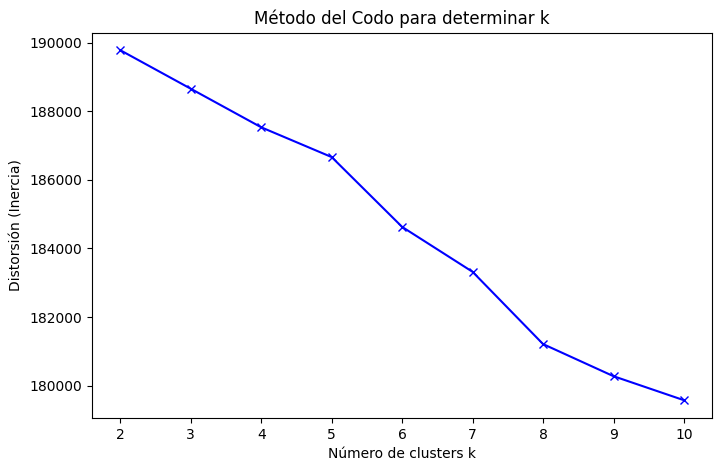

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Suponiendo que ya has separado el 'id' y tienes tus datos en X (sin la columna 'id')
# y ya están transformados (numéricos) y listos para el clustering.
# Por ejemplo, si tienes variables categóricas ya convertidas con get_dummies:
# X = pd.get_dummies(X, dummy_na=True)

# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = []
K = range(2, 11)  # rango de k a evaluar, puedes ajustarlo según tus necesidades
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de clusters k')
plt.ylabel('Distorsión (Inercia)')
plt.title('Método del Codo para determinar k')
plt.show()

In [25]:
# Filtrar los elementos donde 'id' sea NaN
id_nan = df[df['id'].isna()]

# Imprimir los resultados
print("Elementos con 'id' NaN:")
print(id_nan)

Elementos con 'id' NaN:
Empty DataFrame
Columns: [Weight, Upper_Material, Midsole_Material, Outsole, Cushioning_System, Drop__heel-to-toe_differential_, Usage_Type, Gender, Available_Sizes, Width, Additional_Technologies, id, regularPrice, undiscounted_price]
Index: []


Conteo de elementos por cluster:
cluster
0      2
1      3
2     22
3     64
4     93
5    268
6      1
7      1
Name: count, dtype: int64

Porcentaje de elementos por cluster:
cluster
0     0.44
1     0.66
2     4.85
3    14.10
4    20.48
5    59.03
6     0.22
7     0.22
Name: count, dtype: float64


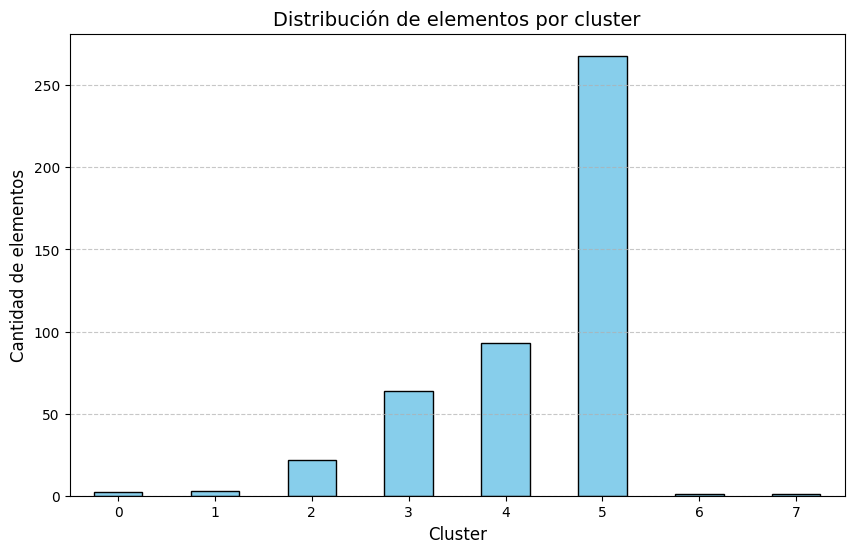

In [37]:
# Conteo de elementos por grupo (cluster)
conteo_clusters = df_clusters['cluster'].value_counts().sort_index()

print("Conteo de elementos por cluster:")
print(conteo_clusters)

# Agregar porcentajes para tener una mejor idea de la distribución
porcentaje_clusters = (conteo_clusters / len(df_clusters) * 100).round(2)
print("\nPorcentaje de elementos por cluster:")
print(porcentaje_clusters)

# Crear una visualización básica de los clusters
import matplotlib.pyplot as plt

# Gráfico de barras
plt.figure(figsize=(10, 6))
conteo_clusters.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de elementos por cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Cantidad de elementos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
df_final = df.merge(df_clusters, on='id', how='left')

Elementos del cluster 2:
     Weight             Upper_Material               Midsole_Material  \
22    585.0            Exterior textil              Mediasuela Bounce   
39    664.8            Exterior textil              Mediasuela Bounce   
42    540.0  Exterior de malla técnica              Mediasuela Bounce   
54    260.0            Exterior textil  Mediasuela 4D de impresión 3D   
113   664.8            Exterior textil              Mediasuela Bounce   
121   584.0  Exterior de malla técnica              Mediasuela Bounce   
243   585.0            Exterior textil              Mediasuela Bounce   
248   584.0             Technical mesh              Mediasuela Bounce   
267   585.0            Exterior textil              Mediasuela Bounce   
287   585.0            Exterior textil              Mediasuela Bounce   
291   585.0            Exterior textil              Mediasuela Bounce   
294   584.0  Exterior de malla técnica              Mediasuela Bounce   
298   584.0  Exterior de m

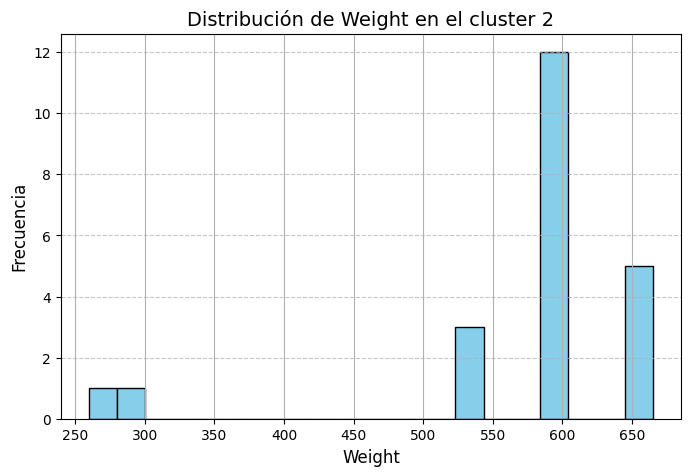

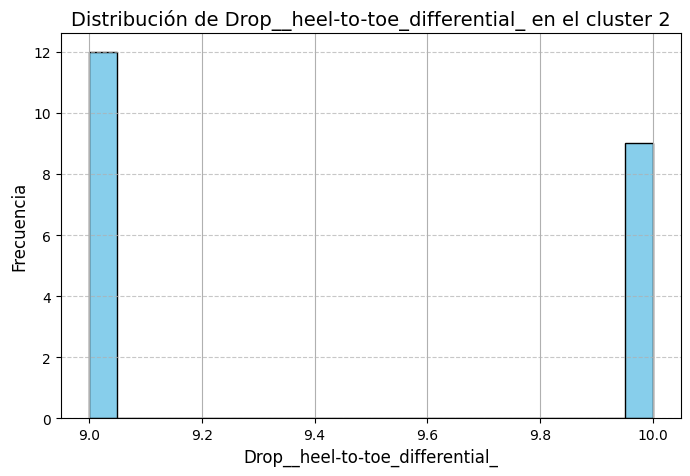

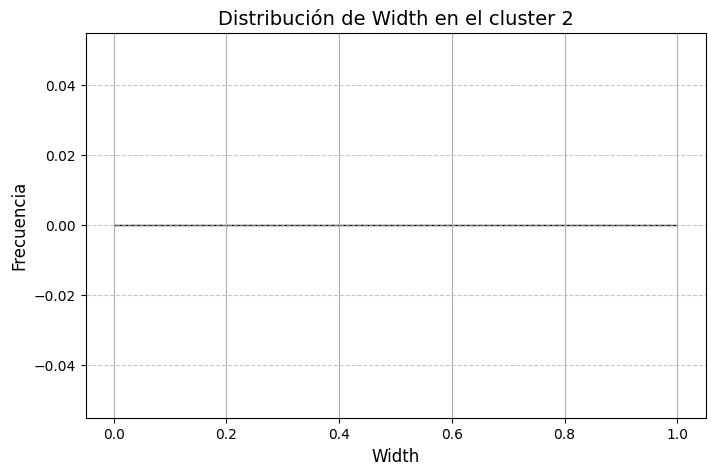

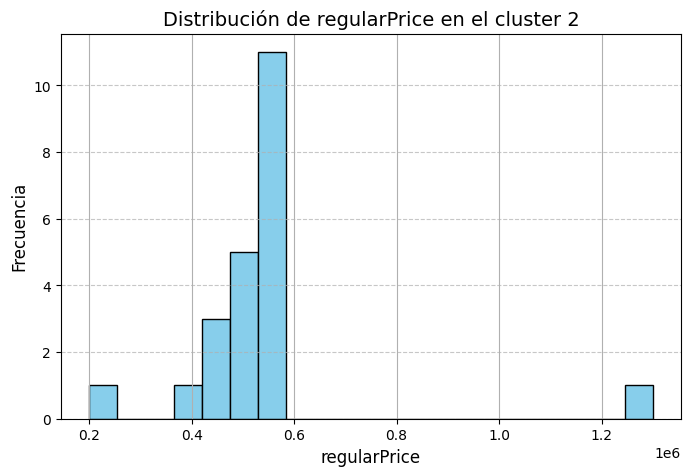

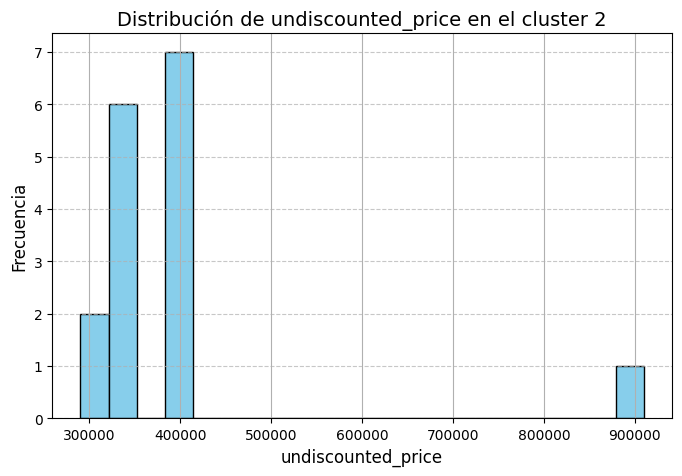

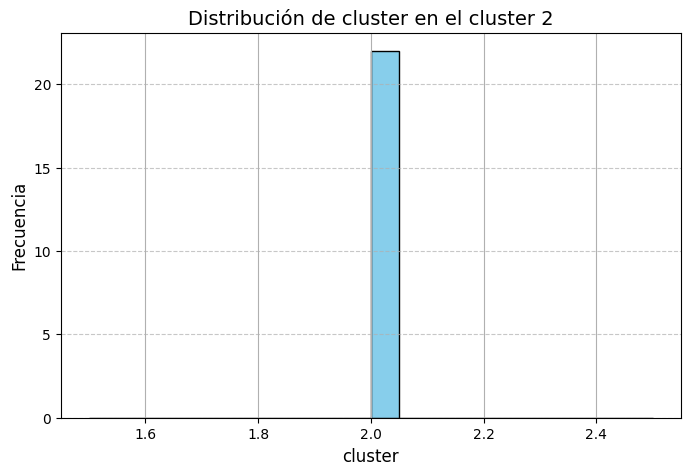

In [40]:
# Elegir el número del cluster a analizar
cluster_a_analizar = 2  # Cambia este valor al número del cluster que quieres analizar

# Filtrar los elementos del cluster específico
elementos_cluster = df_final[df_final['cluster'] == cluster_a_analizar]

print(f"Elementos del cluster {cluster_a_analizar}:")
print(elementos_cluster)

# Estadísticas descriptivas de los datos del cluster
print(f"\nEstadísticas descriptivas del cluster {cluster_a_analizar}:")
print(elementos_cluster.describe())

# Visualizar las características relevantes de los elementos del cluster
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes para el análisis (puedes ajustar según tu caso)
columnas_relevantes = elementos_cluster.select_dtypes(include=['number']).columns

# Crear histogramas para las columnas relevantes
for col in columnas_relevantes:
    plt.figure(figsize=(8, 5))
    elementos_cluster[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col} en el cluster {cluster_a_analizar}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


Elementos del cluster 3:
     Weight               Upper_Material         Midsole_Material  \
7     213.0      Parte superior de malla             Dreamstrike+   
15    334.0    Exterior técnico de malla   Mediasuela Dreamstrike   
32    247.0  Parte superior de monomalla              LIGHTMOTION   
35    248.0              Exterior textil   Tecnología Light BOOST   
40    254.0                    Monomalla             Dreamstrike+   
..      ...                          ...                      ...   
414   243.0  Exterior de malla acolchada             Dreamstrike+   
428   290.0      Parte superior de malla  Mediasuela Dreamstrike+   
429   290.0      Parte superior de malla             Dreamstrike+   
442   213.0      Parte superior de malla  mediasuela Dreamstrike+   
450   295.0             adidas PRIMEKNIT       4D de impresión 3D   

                             Outsole                  Cushioning_System  \
7                      Suela Adiwear                       Dreamstrike+

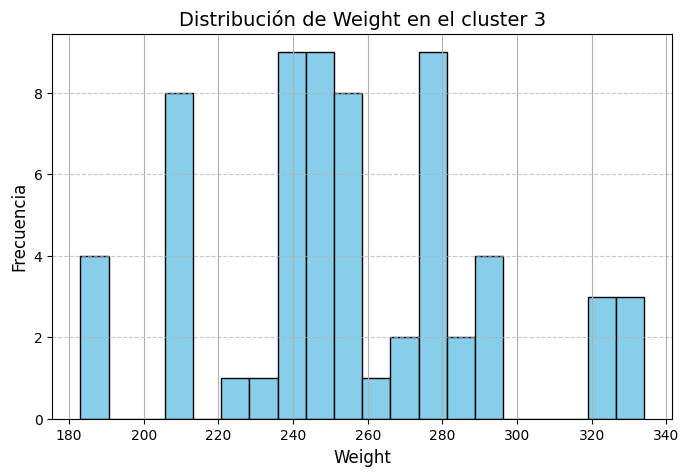

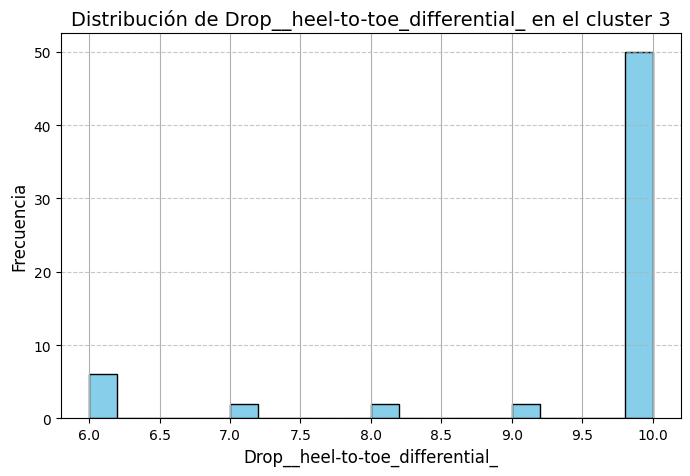

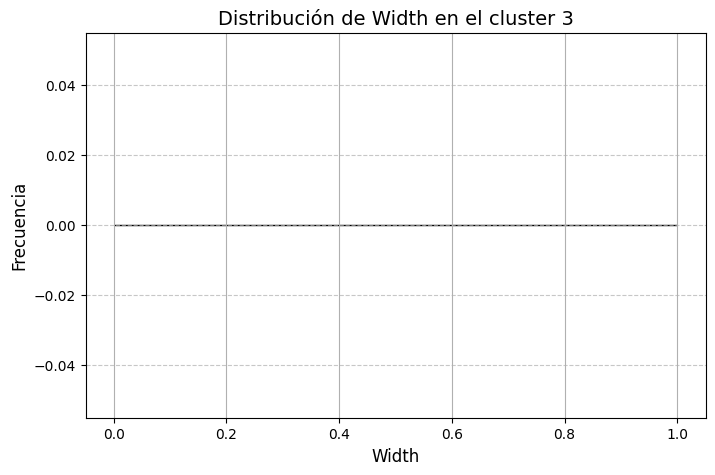

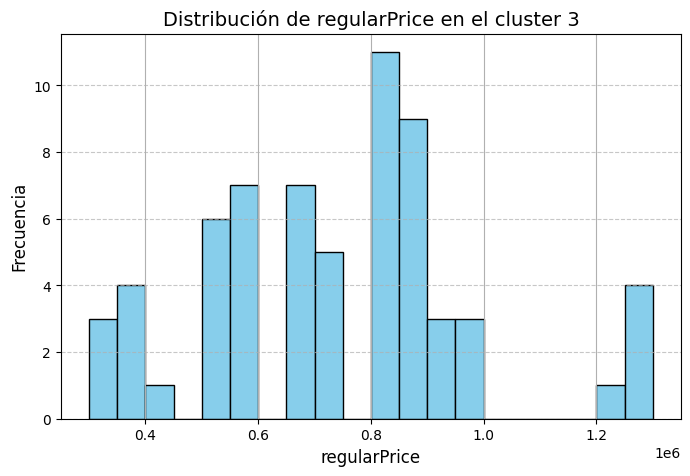

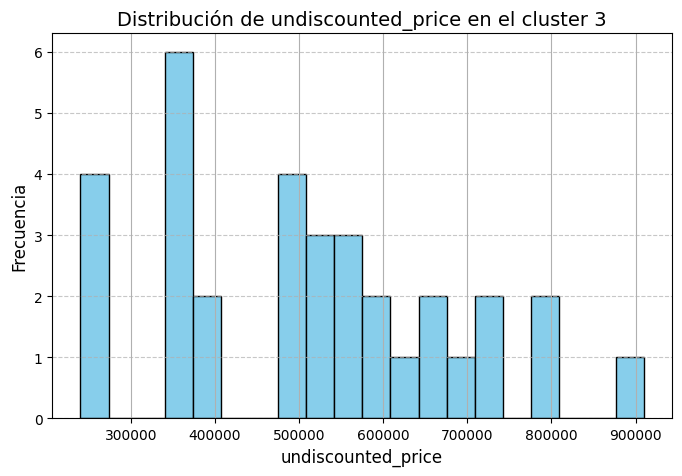

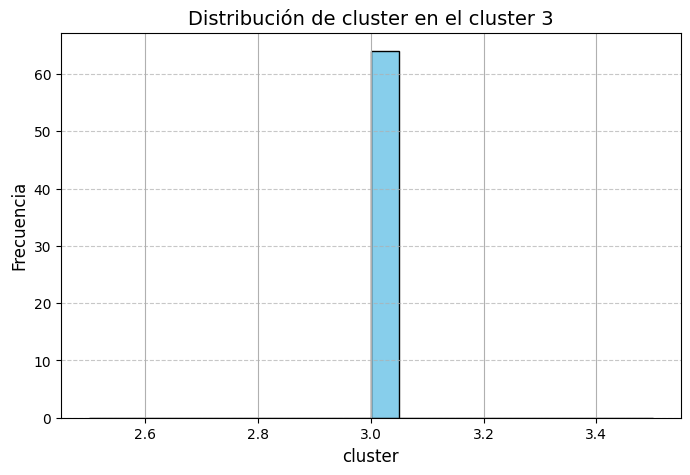

In [41]:
# Elegir el número del cluster a analizar
cluster_a_analizar = 3  # Cambia este valor al número del cluster que quieres analizar

# Filtrar los elementos del cluster específico
elementos_cluster = df_final[df_final['cluster'] == cluster_a_analizar]

print(f"Elementos del cluster {cluster_a_analizar}:")
print(elementos_cluster)

# Estadísticas descriptivas de los datos del cluster
print(f"\nEstadísticas descriptivas del cluster {cluster_a_analizar}:")
print(elementos_cluster.describe())

# Visualizar las características relevantes de los elementos del cluster
import matplotlib.pyplot as plt

# Seleccionar columnas relevantes para el análisis (puedes ajustar según tu caso)
columnas_relevantes = elementos_cluster.select_dtypes(include=['number']).columns

# Crear histogramas para las columnas relevantes
for col in columnas_relevantes:
    plt.figure(figsize=(8, 5))
    elementos_cluster[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col} en el cluster {cluster_a_analizar}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
